# PERGUNTAS PARA A ANÁLISE(GPT)

1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"<br>
→ Objetivo: Prever a variável Credit Score.<br>
→ Tipo: Classificação multiclasse (High, Medium, Low).<br><br>

2. "Pessoas casadas têm mais chances de ter crédito alto do que pessoas solteiras?"<br>
→ Objetivo: Avaliar a influência de Marital Status sobre o Credit Score.<br><br>

3. "O número de filhos afeta diretamente a pontuação de crédito de um indivíduo?"<br>
→ Objetivo: Entender se a feature Number of Children tem relevância na predição.<br><br>

4. "O tipo de moradia (própria ou alugada) impacta o score de crédito?"<br>
→ Objetivo: Avaliar a importância de Home Ownership na previsão de crédito.<br><br>

5. "Qual perfil tem maior chance de ter crédito alto: uma mulher jovem com ensino superior e renda média, ou um homem mais velho com ensino médio e alta renda?"<br>
→ Objetivo: Criar perfis simulados com base nas colunas Age, Gender, Income, Education, e ver o comportamento do modelo ao classificá-los.<br>

In [3]:
import pandas as pd

In [41]:
df = pd.read_csv('data/Credit-Score.csv')

In [42]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


### Tratamento de dados

In [43]:
# Valores nulos
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [44]:
# Valores ausentes
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [45]:
# Valores duplicados
df.duplicated().sum()

62

In [46]:
duplicadas = df[df.duplicated()]
print(duplicadas)

     Age  Gender  Income            Education Marital Status  \
73    27  Female   37500  High School Diploma         Single   
74    32    Male   57500   Associate's Degree         Single   
79    28  Female   32500   Associate's Degree         Single   
80    33    Male   52500  High School Diploma         Single   
81    38  Female   67500    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Single   
163   49  Female   77500            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
73                    0         Rented          Low  
74                    0         Rented      Average  
79                    0         Rented          Low  
80             

In [47]:
# Verificando linhas duplicadas
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
29,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
135,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
58,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
90,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
122,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
...,...,...,...,...,...,...,...,...
146,51,Male,140000,Bachelor's Degree,Married,0,Owned,High
46,52,Male,130000,High School Diploma,Married,0,Owned,High
152,52,Male,130000,High School Diploma,Married,0,Owned,High
52,53,Male,122500,Associate's Degree,Married,0,Owned,High


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [12]:
print("Valore únicos nas colunas:")
for col in df.select_dtypes(include = 'object'):
    print(df[col].unique())

Valore únicos nas colunas:
['Female' 'Male']
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['Single' 'Married']
['Rented' 'Owned']
['High' 'Average' 'Low']


## Pré processamento de dados

In [43]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [50]:
# Features(X)
x_credit = df.iloc[:, 0:7]
x_credit

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned
...,...,...,...,...,...,...,...
130,31,Male,95000,Doctorate,Single,0,Rented
131,26,Female,55000,Bachelor's Degree,Married,1,Owned
132,32,Male,85000,Master's Degree,Single,0,Rented
133,29,Female,68000,Doctorate,Married,2,Owned


In [51]:
# Target(Y)
y_credit = df['Credit Score']
y_credit

0         High
1         High
2         High
3         High
4         High
        ...   
130       High
131    Average
132       High
133    Average
134       High
Name: Credit Score, Length: 102, dtype: object

In [52]:
y_credit.unique()

array(['High', 'Average', 'Low'], dtype=object)

Utilização do One Hot Encoder para o pré-processamento dos dados

In [53]:
from sklearn.model_selection import train_test_split
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

### Pré-processamento dos dados

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

OBS: O 'fit_transform' deve ser usado apenas nos dados de treino, para aprender os parâmetros dos dados e aplicar a transformação. Já o 'transform' usa a transformação já treinada e aplica os parâmetros, então deve ser usado nos dados de teste.

In [55]:
OHE_credit = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 4, 6])], remainder = 'passthrough')
x_credit_treinamento = OHE_credit.fit_transform(x_credit_treinamento)
x_credit_teste = OHE_credit.transform(x_credit_teste)

In [56]:
# Salvando o pré-proessamento OHE
import pickle
with open('Pickle/OHE_credit.pkl', 'wb') as arquivo:
    pickle.dump(OHE_credit, arquivo)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit_treinamento = scaler_credit.fit_transform(x_credit_treinamento)
x_credit_teste = scaler_credit.transform(x_credit_teste)

In [58]:
# Salvando o escalonamento Scaler
with open('Pickle/scaler_credit.pkl', 'wb') as arquivo:
    pickle.dump(scaler_credit, arquivo)

In [59]:
from sklearn.preprocessing import LabelEncoder
LE_credit = LabelEncoder()
y_credit_treinamento = LE_credit.fit_transform(y_credit_treinamento)
y_credit_teste = LE_credit.transform(y_credit_teste)

In [60]:
with open('Pickle/LE_credit.pkl', 'wb') as arquivo:
    pickle.dump(LE_credit, arquivo)

In [61]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((76, 14), (76,))

In [62]:
x_credit_teste.shape, y_credit_teste.shape

((26, 14), (26,))

In [63]:
import pickle
with open('Pickle/credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

## Modelo Naive Bayes

In [28]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
naive_credit = GaussianNB()
naive_credit.fit(x_credit_treinamento, y_credit_treinamento)
previsao_credit = naive_credit.predict(x_credit_teste)

In [31]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [32]:
y_credit_teste

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [33]:
naive_credit.score(x_credit_teste, y_credit_teste)

1.0

In [33]:
from sklearn.metrics import accuracy_score, classification_report
# 100% de acerto
round(accuracy_score(y_credit_teste, previsao_credit), 2)

1.0

In [34]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



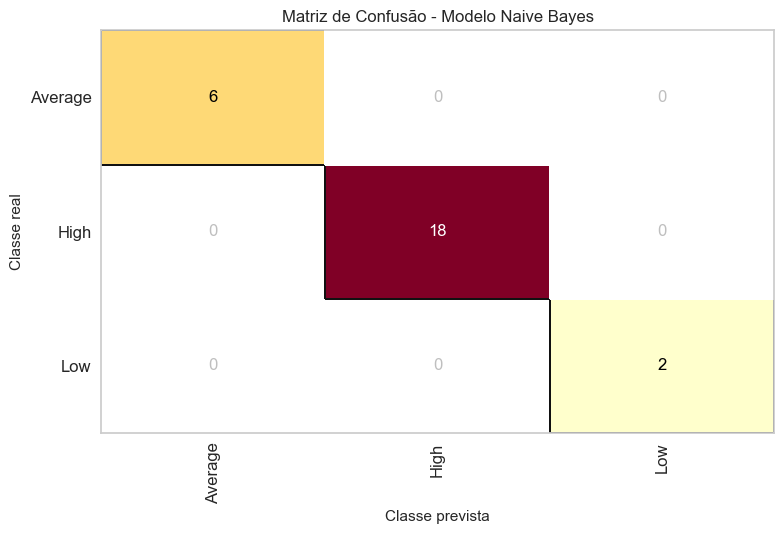

In [6]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Carregando Label Encoder
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Separando as classes
label = list(LE_credit.classes_)

# Criação do visualizer
cm = ConfusionMatrix(naive_credit, classes = label)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

# Personalização
cm.ax.set_title("Matriz de Confusão - Modelo Naive Bayes")
cm.ax.set_xlabel("Classe prevista")
cm.ax.set_ylabel("Classe real")

# Gráfico
plt.tight_layout()
plt.savefig('graphics/Matriz-Confusao-NB', dpi = 300, bbox_inches = 'tight')
plt.show()

In [9]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)
    
import numpy as np

In [10]:
np.bincount(y_credit_treinamento)

array([15, 57,  4], dtype=int64)

In [25]:
# Validação cruzada com 10 divisões diferentes de dados
from sklearn.model_selection import cross_val_score

scores = cross_val_score(naive_credit, OHE_credit.fit_transform(x_credit), LE_credit.fit_transform(y_credit), cv=10)

print(f"Desempenho do modelo em 10 divisões: {list(scores)}\n")
print(f"Média do desempenho do modelo: {scores.mean()}\n\n")

Desempenho do modelo em 10 divisões: [0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9]

Média do desempenho do modelo: 0.9809090909090911




C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [54]:
# Salvando o modelo Naive Bayes
with open('Pickle/modelo_naive_credit.pkl', 'wb') as arquivo:
    pickle.dump(naive_credit, arquivo)

### Modelo Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
arvore_credit = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [27]:
previsao_credit = arvore_credit.predict(x_credit_teste)

In [28]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [30]:
arvore_credit.score(x_credit_teste, y_credit_teste)

1.0

In [49]:
round(accuracy_score(y_credit_teste, previsao_credit), 2)

1.0

In [50]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



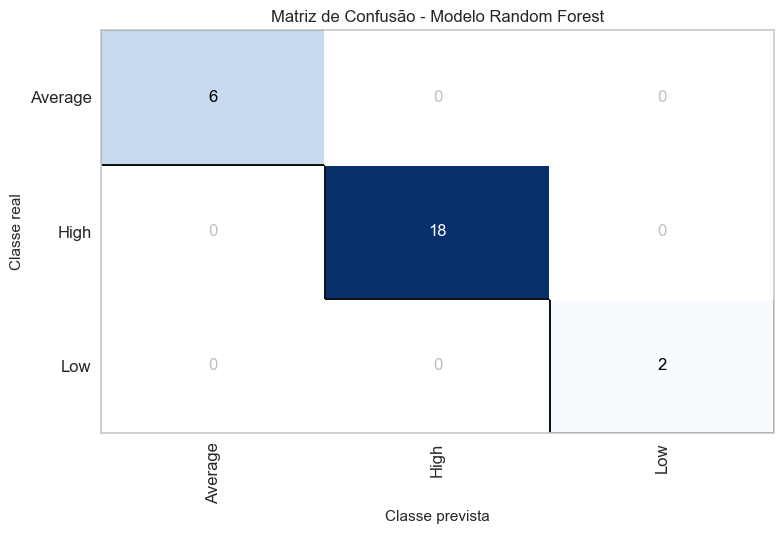

In [4]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Carregando Label Encoder
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Separando as classes
label = list(LE_credit.classes_)

# Criação do visualizer
cm = ConfusionMatrix(arvore_credit, classes = label, cmap='Blues')
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

# Personalização
cm.ax.set_title("Matriz de Confusão - Modelo Random Forest")
cm.ax.set_xlabel("Classe prevista")
cm.ax.set_ylabel("Classe real")

# Gráfico
plt.tight_layout()
plt.savefig('graphics/Matriz-Confusao-RF', dpi = 300, bbox_inches = 'tight')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(arvore_credit, OHE_credit.fit_transform(x_credit), LE_credit.fit_transform(y_credit), cv=10)

print(f"Desempenho do modelo em 10 divisões: {list(scores)}\n")
print(f"Média do desempenho do modelo: {scores.mean()}\n\n")

C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Desempenho do modelo em 10 divisões: [0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]

Média do desempenho do modelo: 0.940909090909091




In [52]:
# Salvando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'wb') as arquivo:
    pickle.dump(arvore_credit, arquivo)

## Próximos passos

Plotar a importância das features (por exemplo: idade, escolaridade, etc.).

Criar visualizações para responder as perguntas preditivas.

Testar o modelo com perfis simulados, como você propôs:

. Mulher jovem com ensino superior e renda média.

. Homem mais velho com ensino médio e renda alta.

### Analisando a importância das features

In [3]:
# Carregando os modelos
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/modelo_naive_credit.pkl', 'rb') as arquivo:
    naive_credit = pickle.load(arquivo)

with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

In [21]:
previsao_arvore_credit = arvore_credit.predict(x_credit_teste)
previsao_arvore_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [22]:
previsao_naive_credit = naive_credit.predict(x_credit_teste)
previsao_naive_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [25]:
arvore_credit.feature_importances_

array([0.02701812, 0.0120358 , 0.029991  , 0.02448702, 0.01432586,
       0.02065534, 0.00714081, 0.01836131, 0.03511193, 0.09428693,
       0.10780344, 0.28404327, 0.31120847, 0.01353071])

In [26]:
# Importancia de cada coluna das features(x)
importances_arvore = arvore_credit.feature_importances_

Agora é preciso acessar o nome das colunas após o pré-processamento(One Hot Encoder) para analisar a importancia de cada uma.

In [27]:
# Pega todos os nomes das colunas one-hot codificadas
ohe = OHE_credit.named_transformers_['OneHot']
ohe_feature_names = ohe.get_feature_names_out(['Gender', 'Education', 'Marital Status', 'Home Ownership'])

O One Hot Encoder foi usado para transformar os dados categóricos, mas os dados numéricos como "Age", "Number of Children"..., não foram transformadas, mas sim mantidas com o parâmetro remainder='passthrough'.

E como o nome das colunas não ficam evidentes entre os dados categóricos transformados e os dados numéricos, é preciso juntar essas colunas em uma só.

In [28]:
# Junta com as colunas numéricas que não foram transformadas
final_feature_names = list(ohe_feature_names) + ['Age', 'Income', 'Number of Children']

Após a junção dessas colunas, é preciso criar um Data frame com o nome das features e a importancia das features, para que possam ser analisados em grafico

In [29]:
# Criação do data frame para análise da importância das features
df_importances = pd.DataFrame({
    'Features': final_feature_names,
    'Importances': importances_arvore
})

# Ordenando os mais importante para os menos
df_importances.sort_values(by = 'Importances', ascending = False)

,Features,Importances
12,Income,0.311208
11,Age,0.284043
10,Home Ownership_Rented,0.107803
9,Home Ownership_Owned,0.094287
8,Marital Status_Single,0.035112
2,Education_Associate's Degree,0.029991
0,Gender_Female,0.027018
3,Education_Bachelor's Degree,0.024487
5,Education_High School Diploma,0.020655
7,Marital Status_Married,0.018361


In [33]:
# Importação das features do modelo Naive Bayes
from sklearn.inspection import permutation_importance

# Calcular importância por permutação
resultado = permutation_importance(
    naive_credit, x_credit_teste, y_credit_teste, n_repeats=10, random_state=0
)

# Criar DataFrame
df_perm_importance = pd.DataFrame({
    'Features': final_feature_names,
    'Importances': resultado.importances_mean
}).sort_values(by='Importances', ascending=False)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

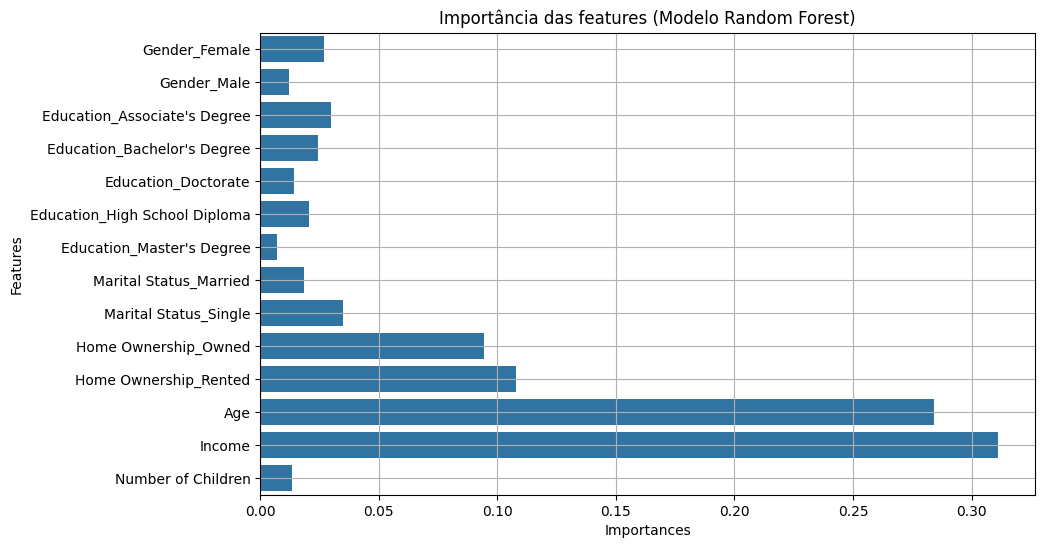

In [31]:
# Importância das features (Modelo Random Forest)
plt.figure(figsize=(10, 6))

sns.barplot(data = df_importances, x = df_importances['Importances'], y = df_importances['Features']).set(title = 'Importância das features (Modelo Random Forest)')

plt.grid(True)

plt.savefig('graphics/importância-das-features-RF.png', dpi = 300, bbox_inches = 'tight')

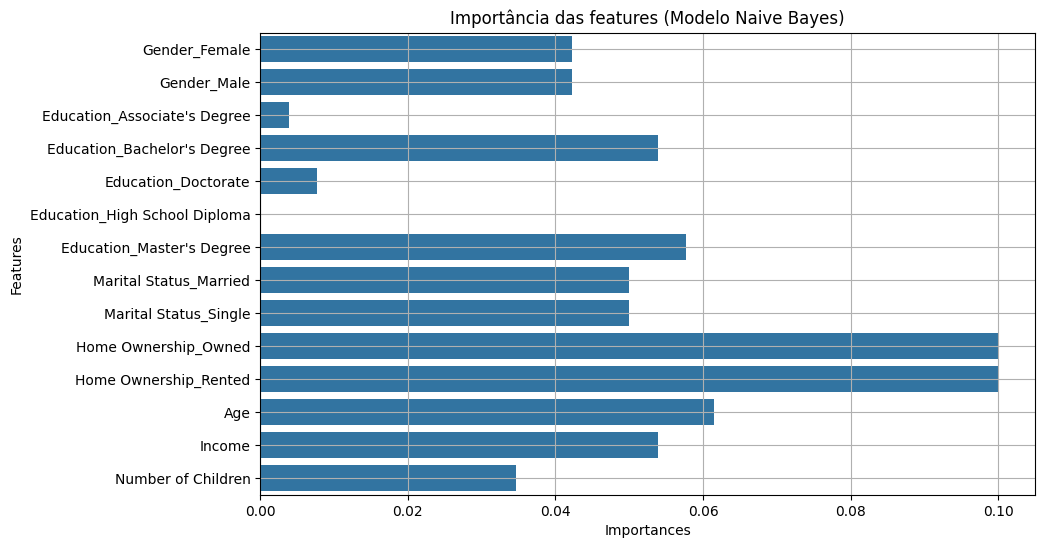

In [35]:
# Importância das features (Modelo Naive Bayes)
plt.figure(figsize=(10, 6))

sns.barplot(data = df_perm_importance, x = df_perm_importance['Importances'], y = df_importances['Features']).set(title = 'Importância das features (Modelo Naive Bayes)')

plt.grid(True)

plt.savefig('graphics/importância-das-features-NB.png', dpi = 300, bbox_inches = 'tight')

## Respondendo primeira pergunta
1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"

Para responder essa pergunta, será feita uma simulação de um novo registro, com os dados necessários para fazer a previsão.

In [12]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [13]:
# Simulação de um novo registro
pessoa1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])
pessoa1

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,30,Male,5000,Bachelor's Degree,Single,0,Rented


Assim como no modelo, é preciso fazer o pré-processamento desses dados para que o modelo possa reconhecer

In [22]:
# Carregando o encoder e o scaler
import pickle
with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

In [15]:
with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

OBS: Para os novos dados que serão usados para previsão, não deve-se usar o "fit_transform" como no treinamento para o pré-processamento, mas sim o "transform"

In [16]:
# Fazendo o pré-processamento
pessoa1 = OHE_credit.transform(pessoa1)
pessoa1 = scaler_credit.transform(pessoa1)
pessoa1

array([[-1.        ,  1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263, -1.11143786,  1.11143786, -1.61834719,
         1.61834719, -1.03804622, -2.6716938 , -0.68350674]])

Agora que o registro foi pré-processado, já é possível realizar a previsão com os modelos

In [17]:
# Carregando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/modelo_naive_credit.pkl', 'rb') as arquivo:
    naive_credit = pickle.load(arquivo)

In [19]:
# Previsão Random Forest
previsao_arvore = arvore_credit.predict(pessoa1)
previsao_arvore

array([0])

In [20]:
# Previsão Naive Bayes
previsao_naive = naive_credit.predict(pessoa1)
previsao_naive

array([0])

In [23]:
print(LE_credit.classes_)

['Average' 'High' 'Low']


In [24]:
for codigo, classe in enumerate(LE_credit.classes_):
    print(f"{codigo} → {classe}")

0 → Average
1 → High
2 → Low


Como é possível ver, a previsão da pessoa1 classificou o crédito com 0, ou seja, chance média ou 'Average', mas para melhorar a resposta é preciso decodificar o Label Encoder com 'inverse_transform'

In [25]:
# Decodificando os rótulos do Label Encoder
resultado_arvore = LE_credit.inverse_transform(previsao_arvore)
resultado_naive = LE_credit.inverse_transform(previsao_naive)

In [116]:
print(f"Classificação de crédito prevista da pessoa 1(Random Forest): {resultado_arvore[0]}")
print(f"Classificação de crédito prevista da pessoa 1(Naive Bayes): {resultado_arvore[0]}")

Classificação de crédito prevista da pessoa 1: Average


### Respondendo a primeira pergunta
Sim, como é possível ver, tanto o modelo Random Forest quanto o modelo Naive Bayes conseguiram prever a classificação do crédito de uma pessoa, resultando na mesma resposta, ou seja, "Avarage" ou classificação média, com uma acurácia de 100% em ambos os modelos.

## Segunda pergunta
2. "Pessoas casadas têm mais chances de ter crédito alto do que pessoas solteiras?"

Para verificar essa informação, é preciso simular duas pessoas que tem condições iguais, como idade, salário e etc. Mas com a diferença de que a primeira pessoa será solteira e a outra será casada, para verificar se isso irá alterar as classificações

In [26]:
# Pessoa solteira
solteiro = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

# Pessoa casada
casado = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Married",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

In [27]:
# Pré-processamento dos dados
solteiro = OHE_credit.transform(solteiro)
solteiro = scaler_credit.transform(solteiro)
solteiro

array([[-1.        ,  1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263, -1.11143786,  1.11143786, -1.61834719,
         1.61834719, -1.03804622, -2.6716938 , -0.68350674]])

In [28]:
casado = OHE_credit.transform(casado)
casado = scaler_credit.transform(casado)
casado

array([[-1.        ,  1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263,  0.89973541, -0.89973541, -1.61834719,
         1.61834719, -1.03804622, -2.6716938 , -0.68350674]])

In [29]:
previsao_solteiro_RF = arvore_credit.predict(solteiro)
previsao_solteiro_RF

array([0])

In [30]:
previsao_solteiro_NB = naive_credit.predict(solteiro)
previsao_solteiro_NB

array([0])

In [31]:
previsao_casado_RF = arvore_credit.predict(casado)
previsao_casado_RF

array([0])

In [32]:
previsao_casado_NB = naive_credit.predict(casado)
previsao_casado_NB

array([0])

In [33]:
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Decodificando os rótulos do Label Encoder
resultado_solteiro_RF = LE_credit.inverse_transform(previsao_solteiro_RF)
resultado_casado_RF = LE_credit.inverse_transform(previsao_casado_RF)

resultado_solteiro_NB = LE_credit.inverse_transform(previsao_solteiro_NB)
resultado_casado_NB = LE_credit.inverse_transform(previsao_casado_NB)

print(f"Classificação de crédito prevista da pessoa solteira (Random Forest): {resultado_solteiro_RF[0]}")
print(f"Classificação de crédito prevista da pessoa casada (Random Forest): {resultado_casado_RF[0]}\n")

print(f"Classificação de crédito prevista da pessoa solteira (Naive Bayes): {resultado_solteiro_NB[0]}")
print(f"Classificação de crédito prevista da pessoa casada (Naive Bayes): {resultado_casado_NB[0]}")

Classificação de crédito prevista da pessoa solteira (Random Forest): Average
Classificação de crédito prevista da pessoa casada (Random Forest): Average

Classificação de crédito prevista da pessoa solteira (Naive Bayes): Average
Classificação de crédito prevista da pessoa casada (Naive Bayes): Average


### Respondendo segunda pergunta
Mais uma vez, os modelos apresentam resultados iguais para esse caso, onde foram comparados duas pessoas com condições identicas e com apenas o estado civíl alterado, com a classificação média de crédito, ou seja, o fato de uma pessoa ser casada não se torna um fator determinante para ter um crédito mais alto, de acordo com os modelos treinados. Porém, pode ser que outros fatores como renda, escolaridade ou número de filhos possam ter um peso maior nessa análise, mas o estado civíl não.

## Terceira pergunta

3. "O número de filhos afeta diretamente a pontuação de crédito de um indivíduo?"
   
→ Objetivo: Entender se a feature Number of Children tem relevância na predição.

Para verificar se o número de filhos tem um impacto no crédito, será feita a mesma coisa que a pergunta anterior, usar dois indivíduos com condições iguais, apenas com a diferença de que um terá filhos e o outro nenhum, para verificar o peso dessa variável.

In [64]:
# Carregamento dos modelos e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/modelo_naive_credit.pkl', 'rb') as arquivo:
    naive_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

In [65]:
# Trabalhadora sem filho
trabalhadora1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

# Trabalhadora com filhos
trabalhadora2 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Married",
    "Number of Children": 2,
    "Home Ownership": "Rented",
}])

In [66]:
# Pré-processamento
trabalhadora1 = OHE_credit.transform(trabalhadora1)
trabalhadora1 = scaler_credit.transform(trabalhadora1)
trabalhadora1

array([[ 1.        , -1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263, -1.11143786,  1.11143786, -1.61834719,
         1.61834719, -1.03804622, -2.70296815, -0.68350674]])

In [67]:
trabalhadora2 = OHE_credit.transform(trabalhadora2)
trabalhadora2 = scaler_credit.transform(trabalhadora2)
trabalhadora2

array([[ 1.        , -1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263,  0.89973541, -0.89973541, -1.61834719,
         1.61834719, -1.03804622, -2.70296815,  1.67769837]])

In [68]:
# Previsão de classes (Random Forest e Naive Bayes)
previsao_trab1_RF = arvore_credit.predict(trabalhadora1)
previsao_trab2_RF = arvore_credit.predict(trabalhadora2)

previsao_trab1_NB = naive_credit.predict(trabalhadora1)
previsao_trab2_NB = naive_credit.predict(trabalhadora2)

# Decodificação
resultado1_RF = LE_credit.inverse_transform(previsao_trab1_RF)
resultado2_RF = LE_credit.inverse_transform(previsao_trab2_RF)

resultado1_NB = LE_credit.inverse_transform(previsao_trab1_NB)
resultado2_NB = LE_credit.inverse_transform(previsao_trab2_NB)

# Resultado
print(f'Previsão de crédito da trabalhadora 1 (Random Forest): {resultado1_RF[0]}')
print(f'Previsão de crédito da trabalhadora 2 (Random Forest): {resultado2_RF[0]}\n')

print(f'Previsão de crédito da trabalhadora 1 (Naive Bayes): {resultado1_NB[0]}')
print(f'Previsão de crédito da trabalhadora 2 (Naive Bayes): {resultado2_NB[0]}')

Previsão de crédito da trabalhadora 1 (Random Forest): Low
Previsão de crédito da trabalhadora 2 (Random Forest): High

Previsão de crédito da trabalhadora 1 (Naive Bayes): Average
Previsão de crédito da trabalhadora 2 (Naive Bayes): Average


## Outro caso
Agora será aumentado o número de filhos da trabalhadora, para verificar se essa variável pode alterar seus resultados na previsão.

In [69]:
# Trabalhadora sem filho
trabalhadora1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

# Trabalhadora com 4 filhos
trabalhadora2 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Married",
    "Number of Children": 4,
    "Home Ownership": "Rented",
}])

In [70]:
trabalhadora1 = OHE_credit.transform(trabalhadora1)
trabalhadora1 = scaler_credit.transform(trabalhadora1)

trabalhadora2 = OHE_credit.transform(trabalhadora2)
trabalhadora2 = scaler_credit.transform(trabalhadora2)

In [71]:
# Previsão de classes (Random Forest e Naive Bayes)
previsao_trab1_RF = arvore_credit.predict(trabalhadora1)
previsao_trab2_RF = arvore_credit.predict(trabalhadora2)

previsao_trab1_NB = naive_credit.predict(trabalhadora1)
previsao_trab2_NB = naive_credit.predict(trabalhadora2)

# Decodificação
resultado1_RF = LE_credit.inverse_transform(previsao_trab1_RF)
resultado2_RF = LE_credit.inverse_transform(previsao_trab2_RF)

resultado1_NB = LE_credit.inverse_transform(previsao_trab1_NB)
resultado2_NB = LE_credit.inverse_transform(previsao_trab2_NB)

# Resultado
print(f'Previsão de crédito da trabalhadora 1 (Random Forest): {resultado1_RF[0]}')
print(f'Previsão de crédito da trabalhadora 2 (Random Forest): {resultado2_RF[0]}\n')

print(f'Previsão de crédito da trabalhadora 1 (Naive Bayes): {resultado1_NB[0]}')
print(f'Previsão de crédito da trabalhadora 2 (Naive Bayes): {resultado2_NB[0]}')

Previsão de crédito da trabalhadora 1 (Random Forest): Low
Previsão de crédito da trabalhadora 2 (Random Forest): High

Previsão de crédito da trabalhadora 1 (Naive Bayes): Average
Previsão de crédito da trabalhadora 2 (Naive Bayes): High


### Respondendo a terceira pergunta
Nesse caso em específico os modelos apresentaram resultados diferentes, tanto no caso da trabalhadora que possui 2 filhos quanto no outro caso onde ela possui 4 filhos, porém mesmo que esses modelos tenham resultados diferentes, eles apontam uma informação em comum, de que a trabalhadora com filhos tem maiores chances de ter uma classificação alta de crédito, o que indica que ela tem maior chance de pagar suas dívidas, o que provavelmente está relacionado com uma estabilidade financeira pelo seu casamento. Portanto, os modelos interpretaram que o número de filhos pode afetar a classificação de crédito de uma pessoa.

## Quarta pergunta
4. "O tipo de moradia (própria ou alugada) impacta o score de crédito?"

→ Objetivo: Avaliar a importância de Home Ownership na previsão de crédito.

Para responder essa pergunta, será usada a mesma estratégia que as perguntas anteriores, comparar duas pessoas com condições identicas, com a única diferença o tipo de moradia dessa vez, para verificar o peso dessa vairável na predição.

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [1]:
# Carregamento dos modelos e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/modelo_naive_credit.pkl', 'rb') as arquivo:
    naive_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

In [4]:
# Morador de aluguel
morador_aluguel = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented"
}])

# Morador com casa própria
morador_cp = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [5]:
# Pré-processamento dos dados
morador_aluguel = OHE_credit.transform(morador_aluguel)
morador_aluguel = scaler_credit.transform(morador_aluguel)
morador_aluguel

array([[-1.        ,  1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263, -1.11143786,  1.11143786, -1.61834719,
         1.61834719, -1.59756049, -2.70296815, -0.68350674]])

In [6]:
morador_cp = OHE_credit.transform(morador_cp)
morador_cp = scaler_credit.transform(morador_cp)
morador_cp

array([[-1.        ,  1.        , -0.41137668,  1.67332005, -0.51639778,
        -0.4330127 , -0.53678263, -1.11143786,  1.11143786,  0.61791438,
        -0.61791438, -1.59756049, -2.70296815, -0.68350674]])

In [8]:
# Previsões
previsao_aluguel_RF = arvore_credit.predict(morador_aluguel)
previsao_cp_RF = arvore_credit.predict(morador_cp)

previsao_aluguel_NB = naive_credit.predict(morador_aluguel)
previsao_cp_NB = naive_credit.predict(morador_cp)

# Decodificação
resultado_aluguel_RF = LE_credit.inverse_transform(previsao_aluguel_RF)
resultado_cp_RF = LE_credit.inverse_transform(previsao_cp_RF)

resultado_aluguel_NB = LE_credit.inverse_transform(previsao_aluguel_NB)
resultado_cp_NB = LE_credit.inverse_transform(previsao_cp_NB)

# Resultado
print(f"Classificação de crédito do morador de aluguel (Random Forest): {resultado_aluguel_RF[0]}")
print(f"Classificação de crédito do morador de casa própria (Random Forest): {resultado_cp_RF[0]}\n")

print(f"Classificação de crédito do morador de aluguel (Naive Bayes): {resultado_aluguel_NB[0]}")
print(f"Classificação de crédito do morador de casa própria (Naive Bayes): {resultado_cp_NB[0]}\n")

Classificação de crédito do morador de aluguel (Random Forest): Average
Classificação de crédito do morador de casa própria (Random Forest): Average

Classificação de crédito do morador de aluguel (Naive Bayes): Average
Classificação de crédito do morador de casa própria (Naive Bayes): Average



## Outra opção
- Comparar uma pessoa de baixa renda mas com casa própria e outra com alta renda e casa alugada

In [18]:
# Morador de aluguel
morador_aluguel = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 0,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented"
}])

# Morador com casa própria
morador_cp = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 10000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [19]:
# Pré-processamento dos dados
morador_aluguel = OHE_credit.transform(morador_aluguel)
morador_aluguel = scaler_credit.transform(morador_aluguel)

morador_cp = OHE_credit.transform(morador_cp)
morador_cp = scaler_credit.transform(morador_cp)

In [20]:
# Previsões
previsao_aluguel_RF = arvore_credit.predict(morador_aluguel)
previsao_cp_RF = arvore_credit.predict(morador_cp)

previsao_aluguel_NB = naive_credit.predict(morador_aluguel)
previsao_cp_NB = naive_credit.predict(morador_cp)

# Decodificação
resultado_aluguel_RF = LE_credit.inverse_transform(previsao_aluguel_RF)
resultado_cp_RF = LE_credit.inverse_transform(previsao_cp_RF)

resultado_aluguel_NB = LE_credit.inverse_transform(previsao_aluguel_NB)
resultado_cp_NB = LE_credit.inverse_transform(previsao_cp_NB)

# Resultado
print(f"Classificação de crédito do morador de aluguel (Random Forest): {resultado_aluguel_RF[0]}")
print(f"Classificação de crédito do morador de casa própria (Random Forest): {resultado_cp_RF[0]}\n")

print(f"Classificação de crédito do morador de aluguel (Naive Bayes): {resultado_aluguel_NB[0]}")
print(f"Classificação de crédito do morador de casa própria (Naive Bayes): {resultado_cp_NB[0]}\n")

Classificação de crédito do morador de aluguel (Random Forest): Average
Classificação de crédito do morador de casa própria (Random Forest): Average

Classificação de crédito do morador de aluguel (Naive Bayes): Average
Classificação de crédito do morador de casa própria (Naive Bayes): Average



### Respondendo a quarta pergunta
Mais uma vez, ambos os modelos Random Forest e Naive Bayes chegam em resultados iguais para ambos os casos, tanto o morador de aluguel quanto o morador de casa própria possuem classificação média de crédito, de acordo com a previsão dos modelos. Porém, ocorre um resultado inesperado em outro caso, onde foram alterados os salários dos moradores, o morador de aluguel tem 0 reais, e o morador de casa própria tem 10.000 reais, porém mesmo assim ambos os modelos classificaram os moradores com classificação média de crédito, o que não faz sentido no contexto real, porém iso não quer dizer que os modelos estejam errados, porque eles interpretaram que a diferença de salário e de tipo de moradia não tiveram peso para alterar suas classificações de crédito, de acordo com os dados do dataset usados na previsão, o que também indica que outras variáveis tem um peso maior, como o "Number of Children", que causou uma mudança de classificação na pergunta anterior. Portanto, mesmo que pareça que essas previsões não tenham sentido, na verdade os modelos apenas aprenderam com os padrões dos dados do dataset, o que indica uma certa inconsistência nos dados originais.

## Quinta pergunta
5. "Qual perfil tem maior chance de ter crédito alto: uma mulher jovem com ensino superior e renda média, ou um homem mais velho com ensino médio e alta renda?"

→ Objetivo: Criar perfis simulados com base nas colunas Age, Gender, Income, Education, e ver o comportamento do modelo ao classificá-los.

In [8]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [21]:
# Carregamento dos modelos e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/modelo_naive_credit.pkl', 'rb') as arquivo:
    naive_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

In [22]:
# Mulher jovem
Julia = pd.DataFrame([{
    "Age": 25,
    "Gender": "Female",
    "Income": 8000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

# Homem mais velho
Paulo = pd.DataFrame([{
    "Age": 50,
    "Gender": "Male",
    "Income": 15000,
    "Education": "High School Diploma",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [23]:
# Pré-processamento dos dados
Julia = OHE_credit.transform(Julia)
Julia = scaler_credit.transform(Julia)

Paulo = OHE_credit.transform(Paulo)
Paulo = scaler_credit.transform(Paulo)

In [24]:
# Previsão
previsao_Julia_RF = arvore_credit.predict(Julia)
previsao_Paulo_RF = arvore_credit.predict(Paulo)

previsao_Julia_NB = naive_credit.predict(Julia)
previsao_Paulo_NB = naive_credit.predict(Paulo)

# Decodificação
resultado_Julia_RF = LE_credit.inverse_transform(previsao_Julia_RF)
resultado_Paulo_RF = LE_credit.inverse_transform(previsao_Paulo_RF)

resultado_Julia_NB = LE_credit.inverse_transform(previsao_Julia_NB)
resultado_Paulo_NB = LE_credit.inverse_transform(previsao_Paulo_NB)

# Resultado
print(f"Classificação de crédito de Júlia, mulher jovem (Random Forest): {resultado_Julia_RF[0]}")
print(f"Classificação de crédito de Paulo, homem mais velho (Random Forest): {resultado_Paulo_RF[0]}\n")

print(f"Classificação de crédito de Júlia, mulher jovem (Naive Bayes): {resultado_Julia_NB[0]}")
print(f"Classificação de crédito de Paulo, homem mais velho (Naive Bayes): {resultado_Paulo_NB[0]}\n")

Classificação de crédito de Júlia, mulher jovem (Random Forest): Average
Classificação de crédito de Paulo, homem mais velho (Random Forest): High

Classificação de crédito de Júlia, mulher jovem (Naive Bayes): Average
Classificação de crédito de Paulo, homem mais velho (Naive Bayes): High



### Respondendo quinta pergunta
Nesse caso, os modelos apresentaram os mesmos resultados na comparação entre duas pessaos fictícias e que possuem condições diferentes, no caso da "Júlia" que é uma mulher jovem com renda média, ensino superior tem um classificação de crédito médio, ou seja, menos chances de pegar as dívidas do que Paulo, o homem mais velho, com apenas o ensino médio completo, mas com um salário alto. Além disso, anteriormente no modelo Random Forest, foi visto que as colunas com maiores importâncias são de "Age" e "Income", ou seja, essas duas colunas tem um peso grande na análise, e a interação entre essas variáveis acabou interpretando que Paulo tem mais chances de pagar suas dívidas do que Júlia, e da mesma forma foi interpretado pelo modelo Naive Bayes.